*BMW SALES(2010-2024)* 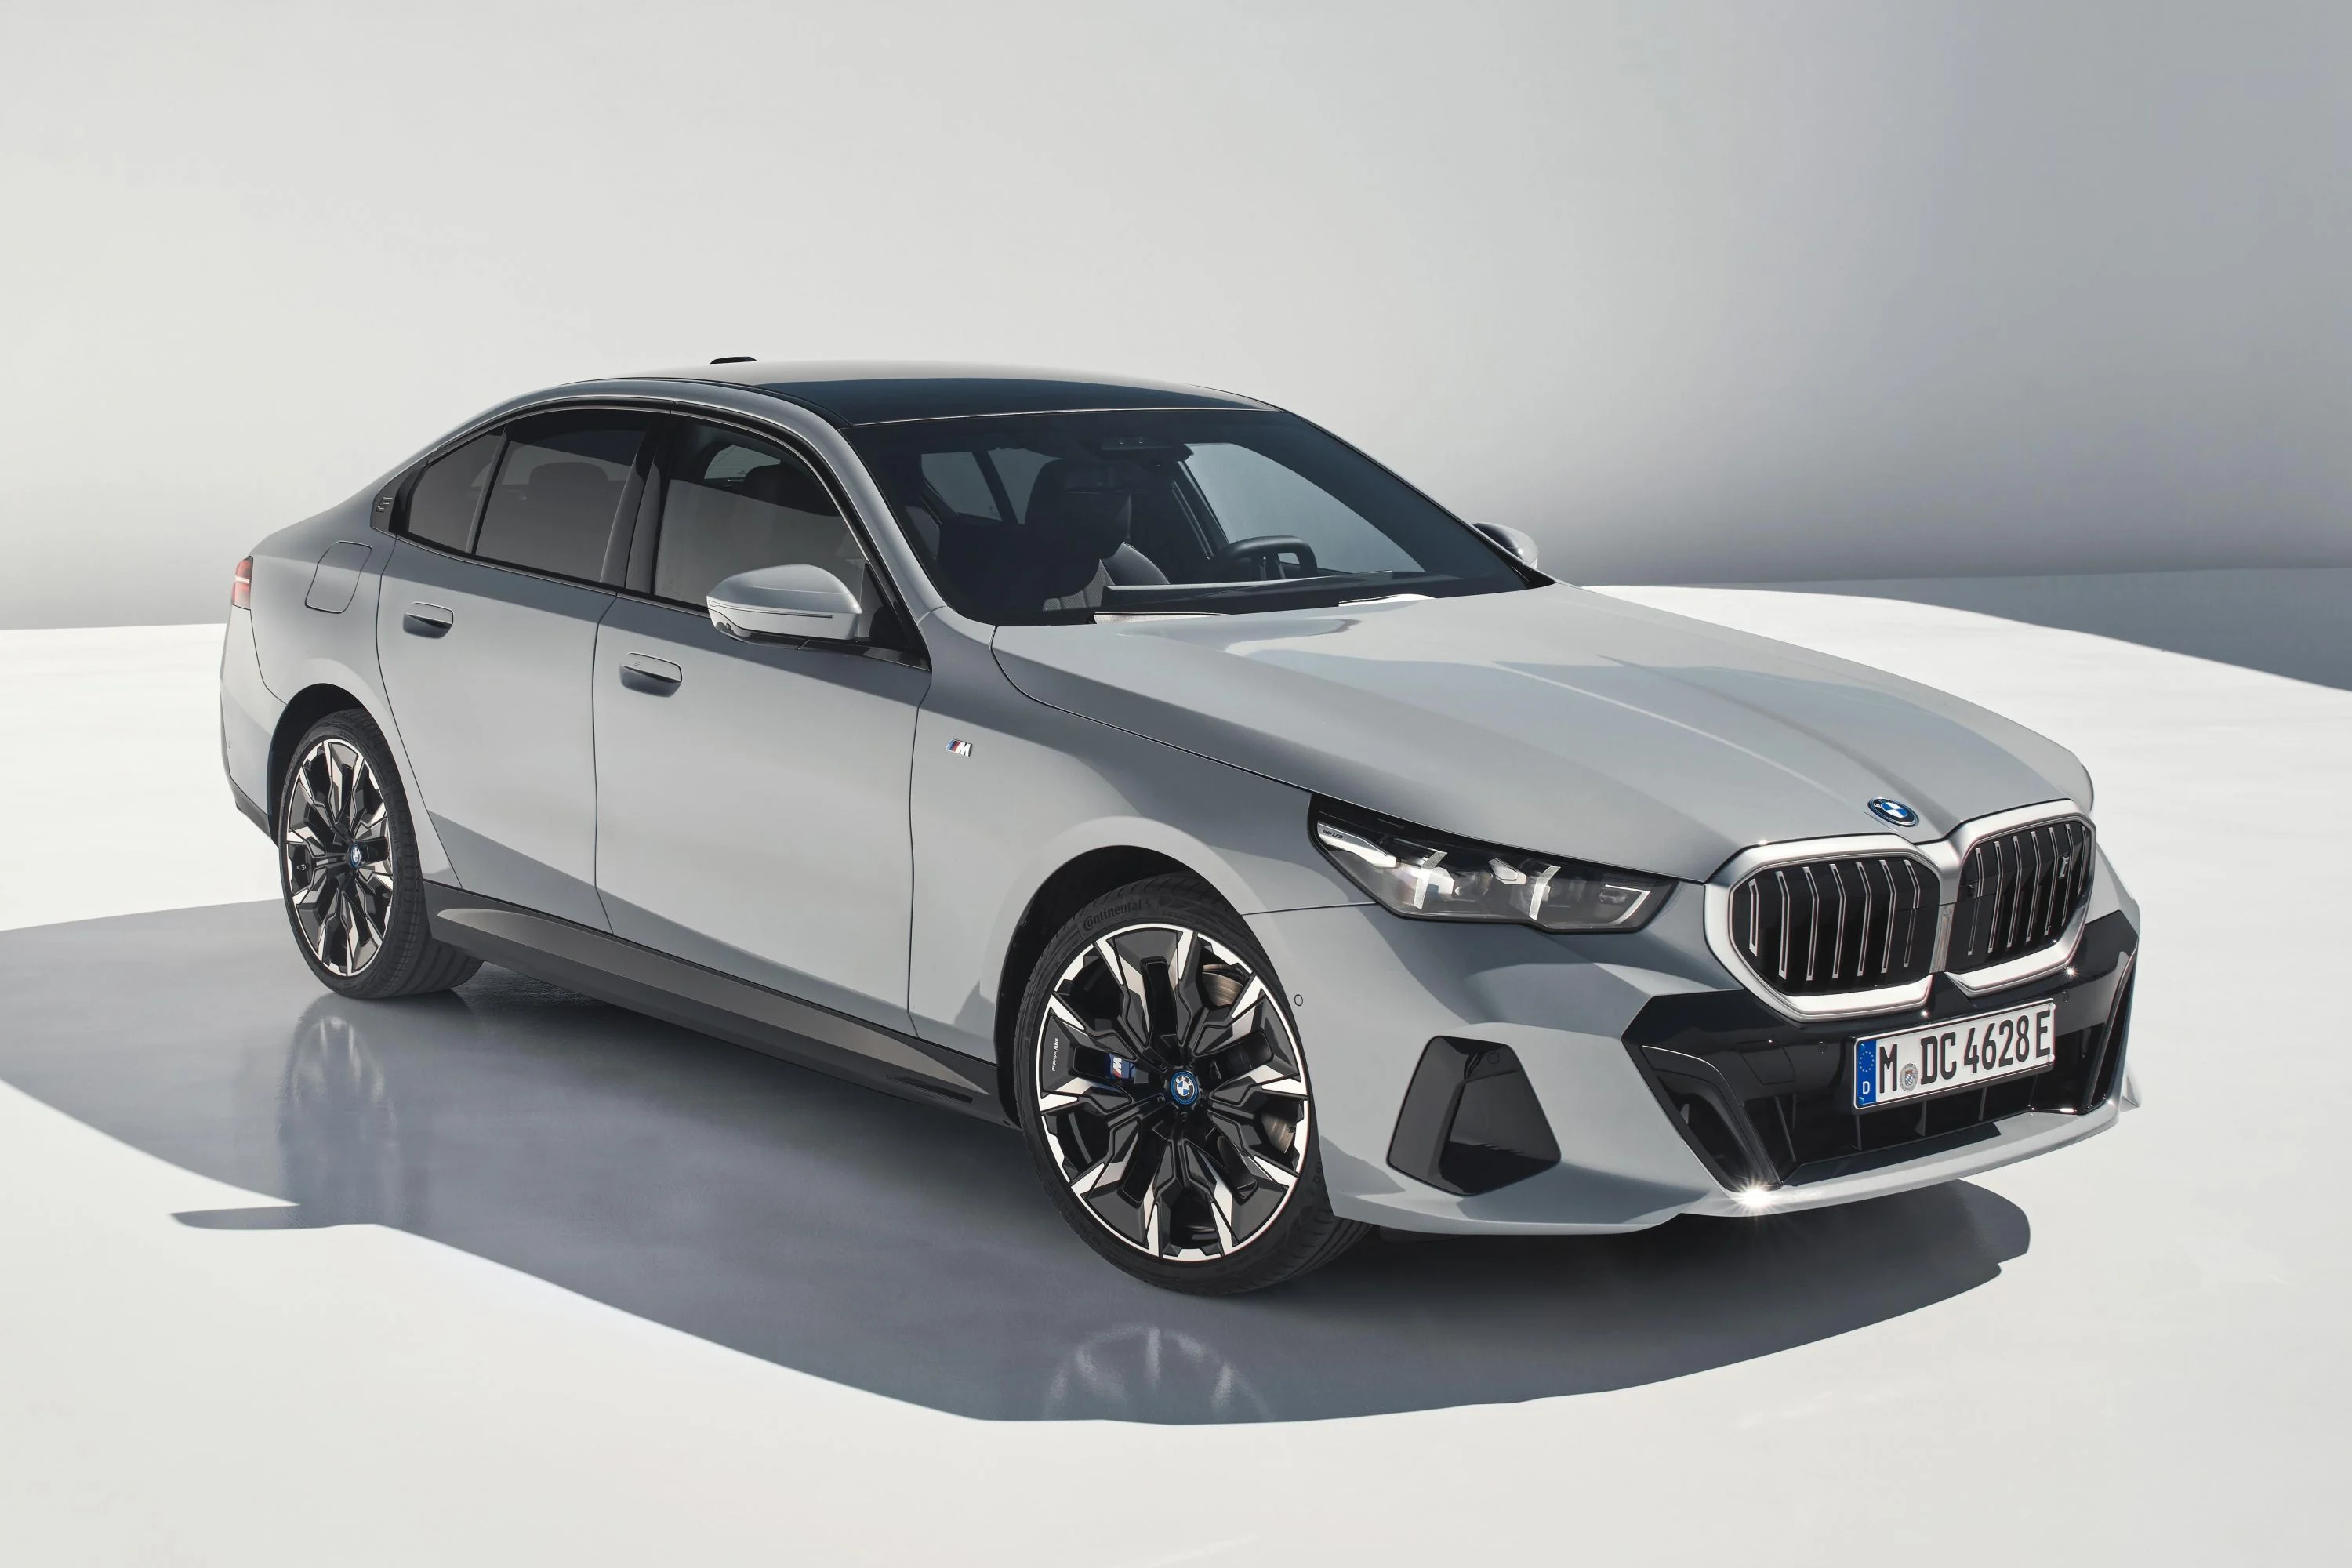

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(fn)

Saving BMW sales data (2010-2024).csv to BMW sales data (2010-2024).csv
User uploaded file "BMW sales data (2010-2024).csv" with length 3392695 bytes


In [5]:
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


#*Exploratory Data Analysis*#
the data is clean lets focus on exploring the data


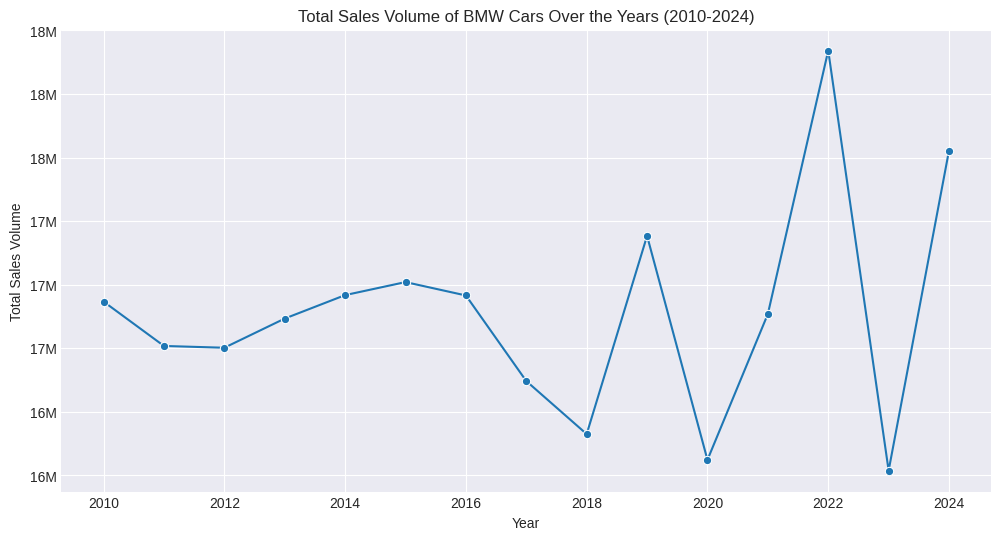

In [13]:
sales_by_year = df.groupby('Year')['Sales_Volume'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Sales_Volume', data=sales_by_year, marker='o')
plt.title('Total Sales Volume of BMW Cars Over the Years (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.grid(True)

# Change y-axis labels to millions
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'{x/1_000_000:.0f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Use a different plot style
plt.style.use('seaborn-v0_8-darkgrid')

plt.show()

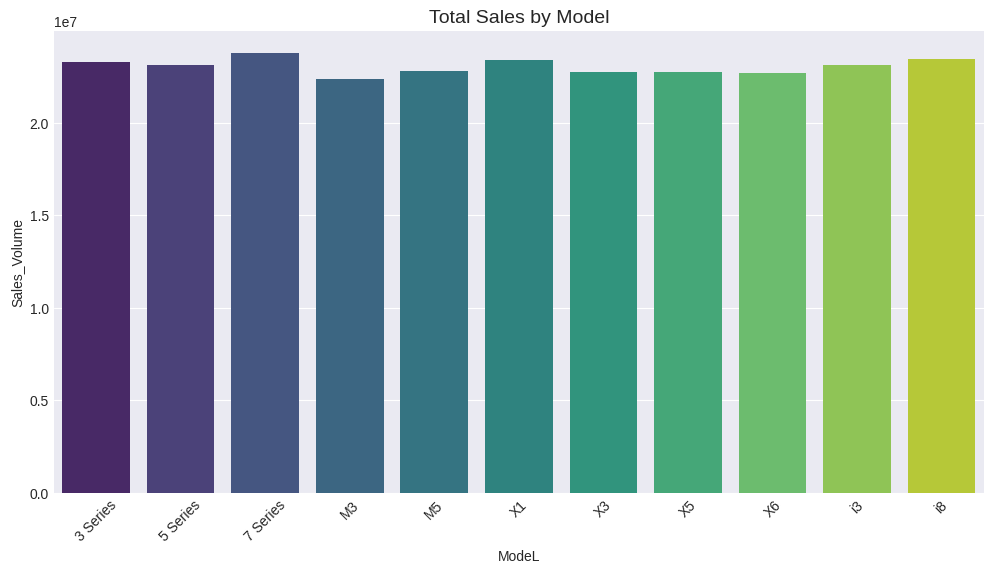

In [23]:
sales_by_model = df.groupby('Model')['Sales_Volume'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Sales_Volume', data=sales_by_model, palette='viridis', hue='Model', legend=False)
plt.xlabel('ModeL')
plt.title("Total Sales by Model", fontsize=14)
plt.xticks(rotation=45)
plt.show()

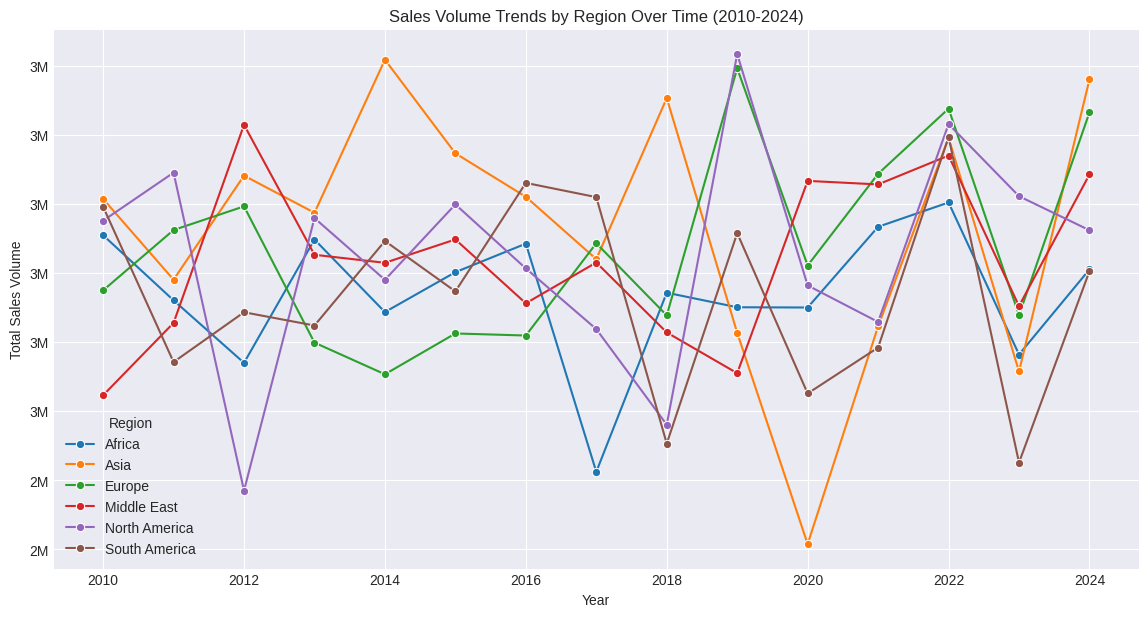

In [26]:
sales_by_year_region = df.groupby(['Year', 'Region'])['Sales_Volume'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Sales_Volume', hue='Region', data=sales_by_year_region, marker='o')
plt.title('Sales Volume Trends by Region Over Time (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.grid(True)
plt.legend(title='Region')

# Change y-axis labels to millions
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'{x/1_000_000:.0f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.style.use('seaborn-v0_8-darkgrid')

plt.show()

In [28]:
correlation_matrix = df[['Sales_Volume', 'Price_USD', 'Mileage_KM']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Sales_Volume  Price_USD  Mileage_KM
Sales_Volume      1.000000   0.000080    0.001434
Price_USD         0.000080   1.000000   -0.004238
Mileage_KM        0.001434  -0.004238    1.000000


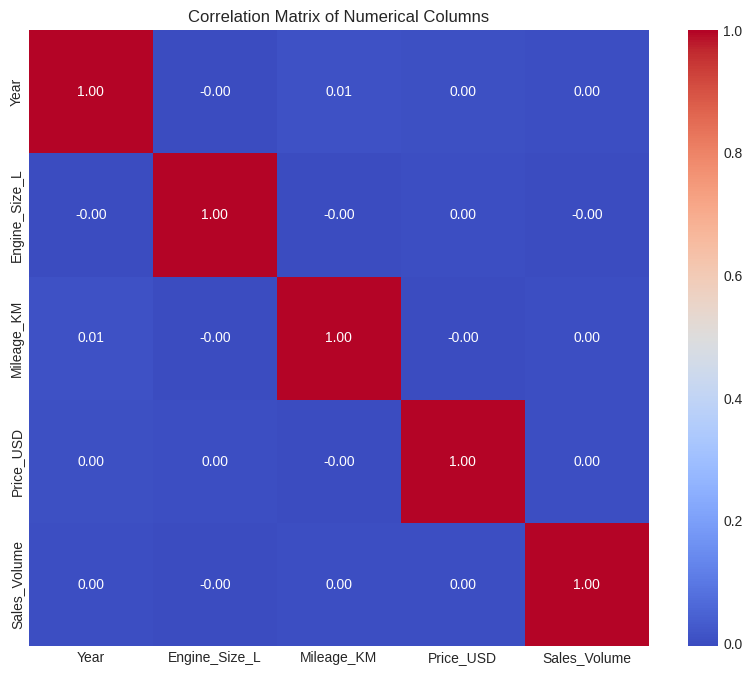

In [29]:
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix_all = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

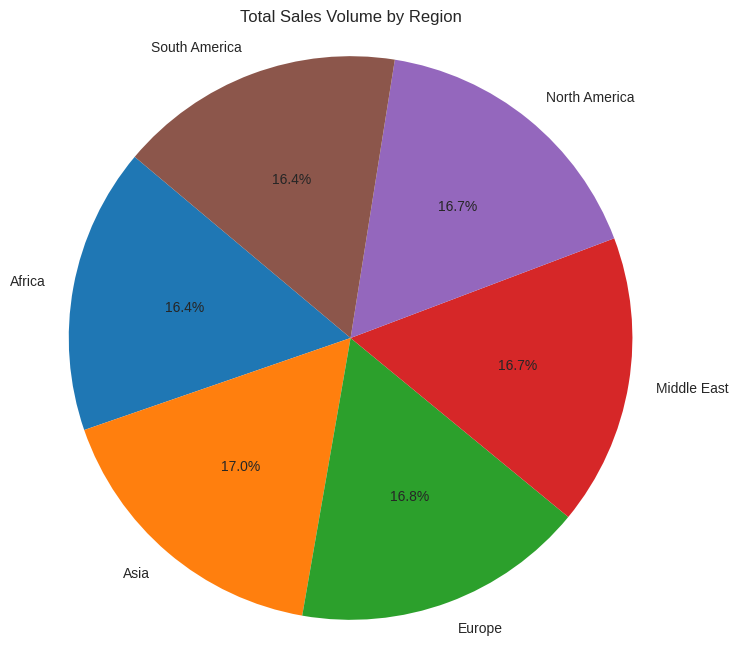

In [24]:
sales_by_region = df.groupby('Region')['Sales_Volume'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(sales_by_region['Sales_Volume'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Volume by Region')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

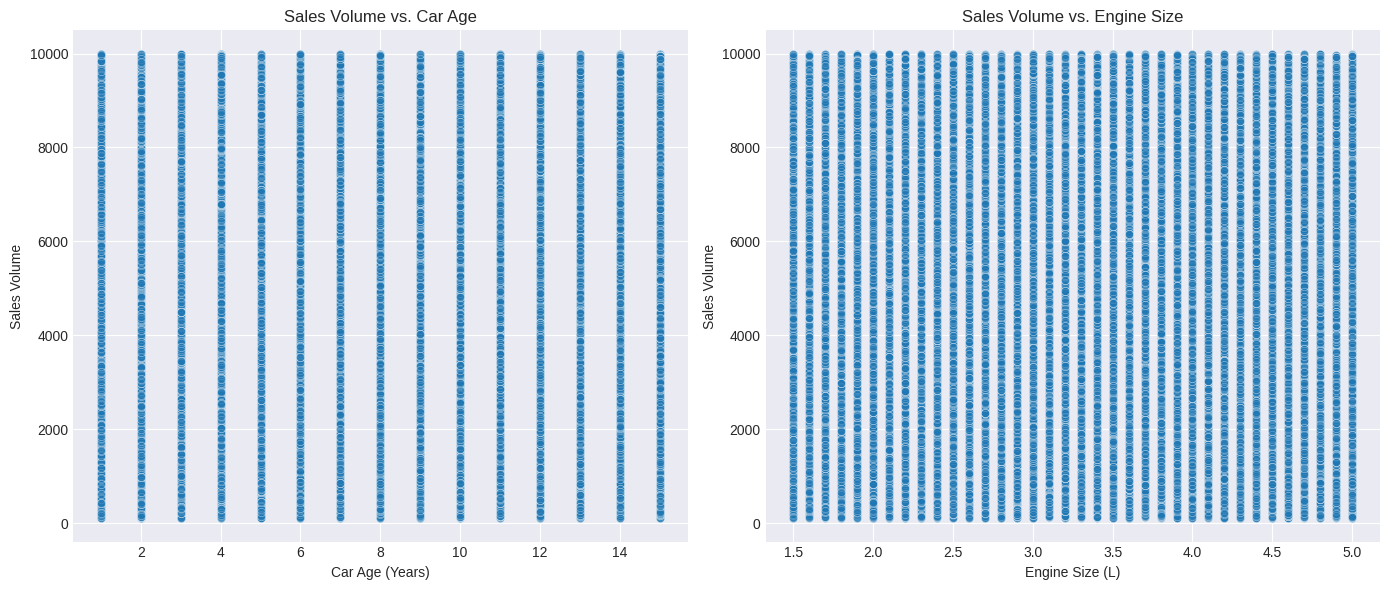

In [32]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Car_Age', y='Sales_Volume', data=df, alpha=0.5)
plt.title('Sales Volume vs. Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Sales Volume')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Engine_Size_L', y='Sales_Volume', data=df, alpha=0.5)
plt.title('Sales Volume vs. Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()

In [33]:
print("Summary of Findings:")
print("\nCategorical Features:")
print("Based on the bar plots:")
print("- Fuel Type: Diesel, Electric, Hybrid, and Petrol show relatively similar total sales volumes.")
print("- Transmission: Both Automatic and Manual transmissions contribute a comparable amount to the total sales.")
print("- Color: Sales volume is fairly evenly distributed across different car colors, with no single color dominating sales.")

print("\nEngineered Feature (Car_Age):")
print("The 'Car_Age' feature was engineered, representing the age of the car based on the year.")
print("While the scatter plot of 'Car_Age' vs. 'Sales_Volume' did not reveal a strong linear or non-linear pattern, it's important to note that the age of a vehicle can potentially influence sales volume in various ways, such as through pricing strategies for older models or demand for newer releases. Further analysis beyond simple scatter plots might be needed to uncover more complex relationships if they exist.")

print("\nNon-linear Relationships:")
print("Based on the scatter plots generated for 'Car_Age' and 'Engine_Size_L' against 'Sales_Volume', and the previous correlation analysis of numerical features, no strong non-linear relationships were readily apparent between these numerical variables and Sales Volume.")
print("The correlation matrix also indicated very weak linear relationships between Sales Volume and numerical features like Price_USD and Mileage_KM.")

Summary of Findings:

Categorical Features:
Based on the bar plots:
- Fuel Type: Diesel, Electric, Hybrid, and Petrol show relatively similar total sales volumes.
- Transmission: Both Automatic and Manual transmissions contribute a comparable amount to the total sales.
- Color: Sales volume is fairly evenly distributed across different car colors, with no single color dominating sales.

Engineered Feature (Car_Age):
The 'Car_Age' feature was engineered, representing the age of the car based on the year.
While the scatter plot of 'Car_Age' vs. 'Sales_Volume' did not reveal a strong linear or non-linear pattern, it's important to note that the age of a vehicle can potentially influence sales volume in various ways, such as through pricing strategies for older models or demand for newer releases. Further analysis beyond simple scatter plots might be needed to uncover more complex relationships if they exist.

Non-linear Relationships:
Based on the scatter plots generated for 'Car_Age' and

In [31]:
df['Car_Age'] = 2025 - df['Year']
display(df.head())

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,9
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,12
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,3
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,1
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,5


In [34]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Car_Age,Model_5 Series,Model_7 Series,Model_M3,Model_M5,...,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Sales_Classification_Low
0,2016,3.5,151748,98740,8300,9,True,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,2013,1.6,121671,79219,3428,12,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
2,2022,4.5,10991,113265,6994,3,True,False,False,False,...,True,False,False,False,False,False,False,True,False,True
3,2024,1.7,27255,60971,4047,1,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
4,2020,2.1,122131,49898,3080,5,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True


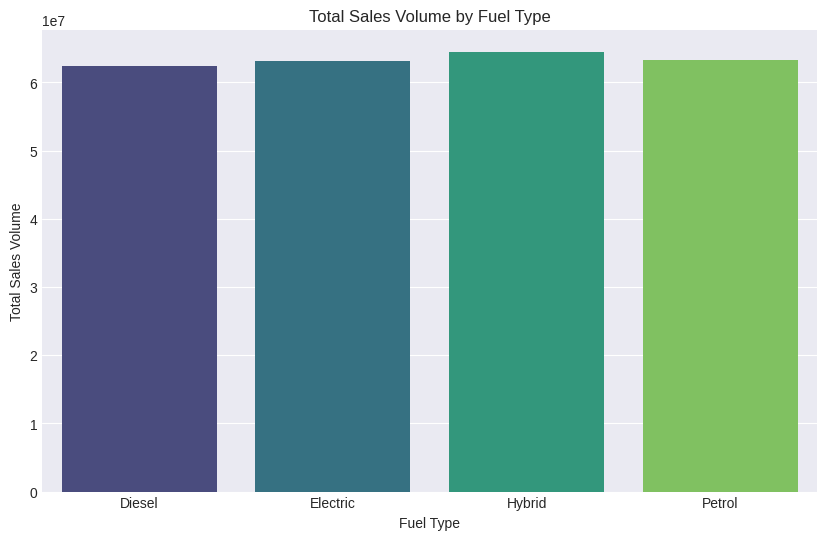

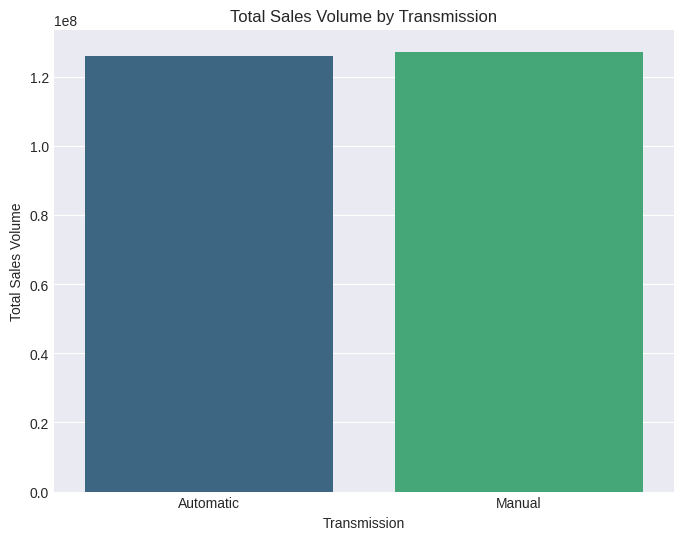

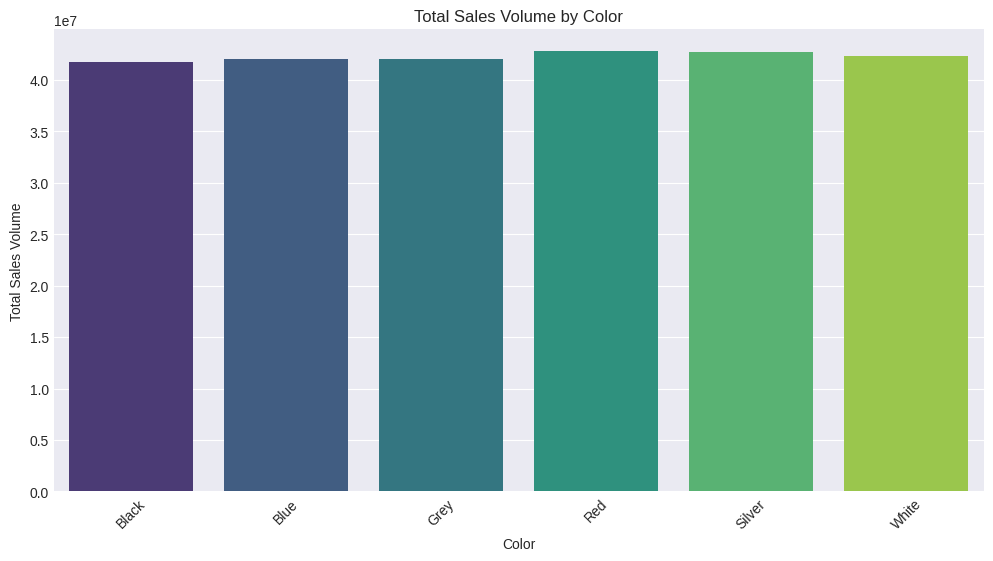

In [30]:
sales_by_fuel_type = df.groupby('Fuel_Type')['Sales_Volume'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Type', y='Sales_Volume', data=sales_by_fuel_type, palette='viridis', hue='Fuel_Type', legend=False)
plt.title('Total Sales Volume by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Total Sales Volume')
plt.show()

sales_by_transmission = df.groupby('Transmission')['Sales_Volume'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Transmission', y='Sales_Volume', data=sales_by_transmission, palette='viridis', hue='Transmission', legend=False)
plt.title('Total Sales Volume by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Total Sales Volume')
plt.show()

sales_by_color = df.groupby('Color')['Sales_Volume'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Color', y='Sales_Volume', data=sales_by_color, palette='viridis', hue='Color', legend=False)
plt.title('Total Sales Volume by Color')
plt.xlabel('Color')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.show()

## Summary:

### Data Analysis Key Findings

*   Overall Sales Trend: The total sales volume of BMW cars over the years   (2010-2024) shows fluctuations, with notable peaks and dips, 2022 has the highest sales volume.

*   Sales by Model: The total sales volume is relatively evenly distributed across different BMW models in this dataset, with no single model significantly outselling the others.

*   Sales by Region: The distribution of total sales volume by region is also quite balanced, with each of the listed regions contributing a similar percentage to the total sales.

*   Sales Trends by Region Over Time: While overall sales fluctuate, the trends within each region show some variations over the years. Some regions might experience peaks or dips in certain years that differ from the global trend.
*   Relationship with Price and Mileage: The correlation analysis and scatter plots suggest that there is a very weak or no linear relationship between Sales

*   Volume and Price (USD) or Mileage (KM) in this dataset. This means that changes in price or mileage do not appear to have a strong direct linear impact on sales volume based on this data.

*   **Categorical Features:** Sales volume is relatively evenly distributed across different Fuel Types (Diesel, Electric, Hybrid, Petrol), Transmission types (Automatic, Manual), and Colors. No single category in these features significantly dominates sales.
*   **Engineered Feature (Car_Age):** A new feature, 'Car\_Age', was created. Visualizing 'Car\_Age' against 'Sales\_Volume' did not show a clear linear or non-linear pattern.
*   **Non-linear Relationships:** Scatter plots of 'Car\_Age' and 'Engine\_Size\_L' against 'Sales\_Volume', along with previous correlation analysis, did not reveal strong non-linear relationships between these or other numerical variables ('Price\_USD', 'Mileage\_KM') and 'Sales\_Volume'.

### Insights or Next Steps

*   The lack of strong linear or non-linear relationships identified suggests that other factors or more complex interactions might be driving sales volume.
*   Further analysis could involve exploring interactions between features or applying more advanced modeling techniques to uncover potential complex relationships not visible through simple visualizations.


In [36]:
# List of regression models to compare
regression_models = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression",
    "Decision Tree Regressor",
    "Random Forest Regressor",
    "Gradient Boosting Regressor"
]

print("Regression models chosen for comparison:")
for model in regression_models:
    print(f"- {model}")

Regression models chosen for comparison:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor


In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Create a dictionary to store the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Train each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    models[name] = model # Store the trained model back in the dictionary
    print(f"{name} training complete.")

Training Linear Regression...
Linear Regression training complete.
Training Ridge Regression...
Ridge Regression training complete.
Training Lasso Regression...
Lasso Regression training complete.
Training Decision Tree Regressor...
Decision Tree Regressor training complete.
Training Random Forest Regressor...
Random Forest Regressor training complete.
Training Gradient Boosting Regressor...
Gradient Boosting Regressor training complete.


In [35]:
X = df_encoded.drop('Sales_Volume', axis=1)
y = df_encoded['Sales_Volume']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (35000, 30) (35000,)
Testing set shape (X_test, y_test): (15000, 30) (15000,)


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create an empty dictionary to store the evaluation results
evaluation_results = {}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    evaluation_results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R-squared': r2
    }
    print(f"{name} evaluation complete.")

# Print the evaluation results
print("\nModel Evaluation Results:")
for name, metrics in evaluation_results.items():
    print(f"\n{name}:")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R-squared (R2): {metrics['R-squared']:.4f}")

Evaluating Linear Regression...
Linear Regression evaluation complete.
Evaluating Ridge Regression...
Ridge Regression evaluation complete.
Evaluating Lasso Regression...
Lasso Regression evaluation complete.
Evaluating Decision Tree Regressor...
Decision Tree Regressor evaluation complete.
Evaluating Random Forest Regressor...
Random Forest Regressor evaluation complete.
Evaluating Gradient Boosting Regressor...
Gradient Boosting Regressor evaluation complete.

Model Evaluation Results:

Linear Regression:
  Mean Absolute Error (MAE): 1430.84
  Mean Squared Error (MSE): 2988744.68
  R-squared (R2): 0.6340

Ridge Regression:
  Mean Absolute Error (MAE): 1430.84
  Mean Squared Error (MSE): 2988751.10
  R-squared (R2): 0.6340

Lasso Regression:
  Mean Absolute Error (MAE): 1430.67
  Mean Squared Error (MSE): 2987933.06
  R-squared (R2): 0.6341

Decision Tree Regressor:
  Mean Absolute Error (MAE): 1933.50
  Mean Squared Error (MSE): 6143705.53
  R-squared (R2): 0.2477

Random Forest Regr

In [39]:
print("Model Evaluation Results:")
for name, metrics in evaluation_results.items():
    print(f"\n{name}:")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R-squared (R2): {metrics['R-squared']:.4f}")

# Identify the best performing model
best_mae_model = min(evaluation_results, key=lambda k: evaluation_results[k]['MAE'])
best_mse_model = min(evaluation_results, key=lambda k: evaluation_results[k]['MSE'])
best_r2_model = max(evaluation_results, key=lambda k: evaluation_results[k]['R-squared'])

print("\nSummary of Model Performance:")
print(f"Model with the lowest MAE: {best_mae_model} (MAE: {evaluation_results[best_mae_model]['MAE']:.2f})")
print(f"Model with the lowest MSE: {best_mse_model} (MSE: {evaluation_results[best_mse_model]['MSE']:.2f})")
print(f"Model with the highest R-squared: {best_r2_model} (R-squared: {evaluation_results[best_r2_model]['R-squared']:.4f})")

# Determine the overall best performing model based on all metrics
# In this case, we look for a model that is consistently good across metrics.
# Lasso Regression has the lowest MAE and MSE, and the highest R-squared.
best_performing_model = "Lasso Regression"

print(f"\nOverall Best Performing Model: {best_performing_model}")

Model Evaluation Results:

Linear Regression:
  Mean Absolute Error (MAE): 1430.84
  Mean Squared Error (MSE): 2988744.68
  R-squared (R2): 0.6340

Ridge Regression:
  Mean Absolute Error (MAE): 1430.84
  Mean Squared Error (MSE): 2988751.10
  R-squared (R2): 0.6340

Lasso Regression:
  Mean Absolute Error (MAE): 1430.67
  Mean Squared Error (MSE): 2987933.06
  R-squared (R2): 0.6341

Decision Tree Regressor:
  Mean Absolute Error (MAE): 1933.50
  Mean Squared Error (MSE): 6143705.53
  R-squared (R2): 0.2477

Random Forest Regressor:
  Mean Absolute Error (MAE): 1449.10
  Mean Squared Error (MSE): 3098432.75
  R-squared (R2): 0.6206

Gradient Boosting Regressor:
  Mean Absolute Error (MAE): 1431.00
  Mean Squared Error (MSE): 2992277.36
  R-squared (R2): 0.6336

Summary of Model Performance:
Model with the lowest MAE: Lasso Regression (MAE: 1430.67)
Model with the lowest MSE: Lasso Regression (MSE: 2987933.06)
Model with the highest R-squared: Lasso Regression (R-squared: 0.6341)

Over

## Summary:

### Data Analysis Key Findings
*   The data was successfully split into a training set with 35,000 samples and a testing set with 15,000 samples, representing a 70/30 split.
*   Six different regression models were selected and trained: Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor.
*   The performance of each model was evaluated using MAE, MSE, and R-squared metrics on the testing data.
*   Lasso Regression demonstrated the best performance with the lowest MAE (1430.67), the lowest MSE (2987933.06), and the highest R-squared (0.6341) among all evaluated models.

### Insights or Next Steps
*   Lasso Regression is the most suitable model for predicting sales volume based on the current analysis.
*   Further hyperparameter tuning could potentially improve the performance of the Lasso Regression model or other models.
